# Identificación automática de Placas v 1.0

In [16]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## 1. Leer la imagen y convertirla a escala de grises

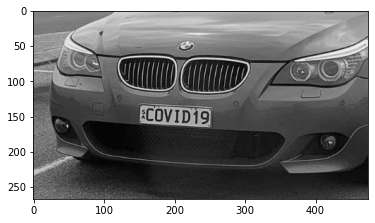

In [17]:
img = cv2.imread('image2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Aplicar filtro y encontrar los bordes

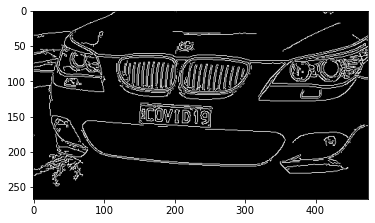

In [18]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 20, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Encontrar el contorno 

In [19]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [20]:
location = None 
for contour in contours: 
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4: 
        location = approx
        break

In [21]:
location

array([[[152, 136]],

       [[248, 139]],

       [[251, 164]],

       [[153, 160]]], dtype=int32)

In [28]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

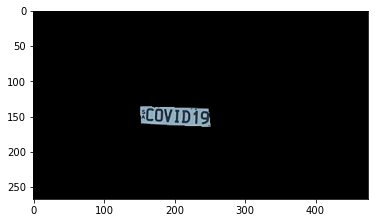

In [22]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [29]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

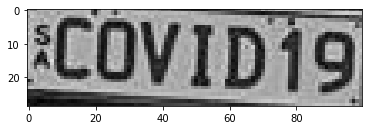

In [33]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Utilizar OCR para leer texto

In [36]:
read = easyocr.Reader(['en'])
result = read.readtext(cropped_image)
result

[([[0, 0], [100, 0], [100, 29], [0, 29]], 'ICOVIDT9', 0.5350359264282427)]

El resultado no es muy preciso, toma otras letras y toma valores extras. Consideraremos utilizar redes neuronales para un reconocimiento más preciso. ¿Deep learning?